In [1]:
import pandas as pd
import numpy as np
import hmmlearn.hmm as hmm
import torch
from IOHMM import IOHMM_model
import matplotlib.pyplot as plt



In [2]:
# Define an HMM model with Gaussian emissions

model = hmm.GaussianHMM(n_components=2,
                        covariance_type="diag",
                        n_iter=100)

model.startprob_ = np.array([0.7, 0.3])

model.transmat_ = np.array([[0.8, 0.2],
                            [0.2, 0.8]])

model.means_ = np.array([[3.0],
                         [-3.0]])

model.covars_ = np.array([[1.0],
                          [1.0]])

In [3]:
# Sample data from the model and display it
output, state = model.sample(100)
df = pd.DataFrame(state, columns=["state"])
df["output"] = output

df.head()

,state,output
0,0,3.816207
1,0,3.943749
2,0,2.394106
3,0,3.041749
4,0,5.437762


In [4]:
"""
Let us add an input feature which is observable.

Suppose that the output distribution depends on the input

    output = N(mean_emission + 0.1 * input, var_emission)

The state is independent of the input.
"""

# Revert the formula
means = model.means_[df["state"]]
df["input"] = (df["output"].to_numpy() - means.squeeze()) / (df["output"].to_numpy() - means.squeeze())



df.head(10)

,state,output,input
0,0,3.816207,1.0
1,0,3.943749,1.0
2,0,2.394106,1.0
3,0,3.041749,1.0
4,0,5.437762,1.0
5,0,3.229887,1.0
6,1,-1.954573,1.0
7,1,-3.356621,1.0
8,1,-2.185330,1.0
9,1,-3.067396,1.0


In [5]:
# Train the IOHMM

# input output to torch
input = torch.tensor(df["input"].to_numpy(), dtype=torch.float32).view(-1, 1)
output = torch.tensor(df["output"].to_numpy(), dtype=torch.float32).view(-1, 1)

print(output.shape)

IOHMM = IOHMM_model(num_states=2, inputs=input, outputs=output, max_iter=100, tol=1e-4, transition_matrix=None, emission_matrix=None)


torch.Size([100, 1])


In [6]:
IOHMM._baum_welch()
IOHMM.emission_matrix
IOHMM.transition_matrix

Iteration 1, likelihood: -inf
tensor([[-0.6043, -0.7906],
        [-0.2969, -1.3590],
        [-0.2735, -1.4301],
        [-0.2603, -1.4731],
        [-0.2294, -1.5849],
        [-0.2482, -1.5151],
        [-0.3226, -1.2882],
        [-0.3641, -1.1868],
        [-0.3543, -1.2096],
        [-0.3666, -1.1811],
        [-0.2917, -1.3743],
        [-0.2503, -1.5076],
        [-0.2580, -1.4811],
        [-0.3203, -1.2943],
        [-0.3641, -1.1869],
        [-0.3619, -1.1920],
        [-0.3740, -1.1646],
        [-0.3553, -1.2071],
        [-0.3728, -1.1674],
        [-0.3734, -1.1661],
        [-0.3425, -1.2378],
        [-0.3764, -1.1595],
        [-0.2758, -1.4228],
        [-0.2769, -1.4194],
        [-0.2575, -1.4828],
        [-0.2317, -1.5759],
        [-0.2419, -1.5376],
        [-0.2412, -1.5404],
        [-0.2509, -1.5055],
        [-0.2307, -1.5799],
        [-0.2542, -1.4941],
        [-0.2749, -1.4256],
        [-0.2784, -1.4148],
        [-0.2727, -1.4328],
        [-0.2505, 

Parameter containing:
tensor([[[ -47.5078,  -49.2575],
         [  47.5487,   47.0186]],

        [[ 495.0659,  492.8604],
         [-494.3395, -493.4520]]], requires_grad=True)

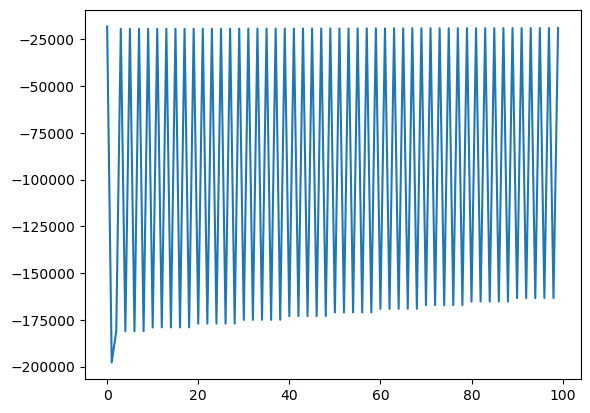

In [7]:
plt.plot(IOHMM.history)

In [8]:
viterbi_path = IOHMM.viterbi()
print(viterbi_path)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
